In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 2 LOGISTICREGRESSION/LOGISTICREGRESSION/LOGISTICREGRESSION LOGISTICREGRESSION 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
# =================================================-
#### Slide 3: Loading packages  ####

from pathlib import Path

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import linear_model

In [3]:
main_dir = Path.cwd().parent
data_dir = main_dir / "data"

In [4]:
# =================================================-
#### Slide 6: Load data into Python  ####

df = pd.read_csv(data_dir / "healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# =================================================-
#### Slide 7: Subset data  ####

# df_subset = df[
#     [
#         "age",
#         "avg_glucose_level",
#         "heart_disease",
#         "ever_married",
#         "hypertension",
#         "Residence_type",
#         "gender",
#         "smoking_status",
#         "work_type",
#         "stroke",
#         "id",
#     ]
# ]
# print(df_subset.head())

In [6]:
df = df.set_index("id")

In [7]:
dummy_df = pd.get_dummies(df, columns=df.select_dtypes("object").columns)
dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
51676,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,NaN,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
19723,35.0,0,0,82.99,30.6,0,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [8]:
# =================================================-
#### Slide 8: Convert target to binary  ####

# # Target is binary
# print(df_subset["stroke"].head())
# # Identify the the two unique classes
# unique_values = sorted(df_subset["stroke"].unique())
# df_subset["stroke"] = np.where(df_subset["stroke"] == unique_values[0], False, True)

In [9]:
# =================================================-
#### Slide 11: Data prep: target variable  ####

# print(df_subset["stroke"].dtypes)
# # Identify the the two unique classes
# unique_values = sorted(df_subset["stroke"].unique())
# df_subset["stroke"] = np.where(df_subset["stroke"] == unique_values[0], False, True)
# # Check class again.
# print(df_subset["stroke"].dtypes)

In [10]:
# =================================================-
#### Slide 12: Data prep: check for NAs  ####

# # Check for NAs.
# print(df_subset.isnull().sum())
# percent_missing = df_subset.isnull().sum() * 100 / len(df_subset)
# print(percent_missing)

In [11]:
# =================================================-
#### Slide 13: Data prep: check for NAs (cont'd)  ####

# # Delete columns containing either 50% or more than 50% NaN Values
# perc = 50.0
# min_count = int(((100 - perc) / 100) * df_subset.shape[0] + 1)
# df_subset = df_subset.dropna(axis=1, thresh=min_count)
# print(df_subset.shape)

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
dummy_df = pd.DataFrame(
    imputer.fit_transform(dummy_df), columns=dummy_df.columns, index=df.index
)

In [13]:
# =================================================-
#### Slide 14: Data prep: check for NAs (cont'd)  ####


# # Function to impute NA in both numeric and categorical columns
# def fillna(df):
#     # Fill numeric columns with mean value
#     df = df.fillna(df.mean())
#     # Fill categorical columns with mode value
#     df = df.fillna(df.mode().iloc[0])
#     return df


# df_subset = fillna(df_subset)

In [14]:
# =================================================-
#### Slide 15: Data prep: split data   ####

# # Split the data into X and y
# columns_to_drop_from_X = ["stroke"] + ["id"]
# X = df_subset.drop(columns_to_drop_from_X, axis=1)
# y = np.array(df_subset["stroke"])

In [15]:
# =================================================-
#### Slide 19: Data prep: convert categorical data columns to dummies  ####

# print(X.dtypes)
# X = pd.get_dummies(
#     X,
#     columns=[
#         "heart_disease",
#         "ever_married",
#         "hypertension",
#         "Residence_type",
#         "gender",
#         "smoking_status",
#         "work_type",
#     ],
#     dtype=float,
#     drop_first=True,
# )
# print(X.dtypes)

In [16]:
# Split the data into X and y
X = dummy_df.drop(columns="stroke")
y = dummy_df["stroke"]

In [17]:
# =================================================-
#### Slide 20: Split into train and test set  ####

# Set the seed.
np.random.seed(1)

# Split data into train and test sets, use a 70 train - 30 test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# =================================================-
#### Slide 23: Scale the features (cont'd)  ####

# Initialize scaler.
scaler = preprocessing.MinMaxScaler()

# Fit on training data.
scaler.fit(X_train)

# Scale training and test data.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# =================================================-
#### Slide 27: Logistic regression: build  ####

# Set up logistic regression model.
logistic_regression_model = linear_model.LogisticRegression()
print(logistic_regression_model)

LogisticRegression()


In [20]:
# =================================================-
#### Slide 29: Logistic regression: fit (cont'd)  ####

# Fit the model.
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
# =================================================-
#### Slide 30: Logistic regression: predict  ####

# Predict on test data.
predicted_values = logistic_regression_model.predict(X_test_scaled)
print(predicted_values[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
# =================================================-
#### Slide 37: Confusion matrix and accuracy  ####

# # Take a look at test data confusion matrix.
# conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
# print(conf_matrix_test)
# # Compute test model accuracy score.
# test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
# print("Accuracy on test data: ", test_accuracy_score)

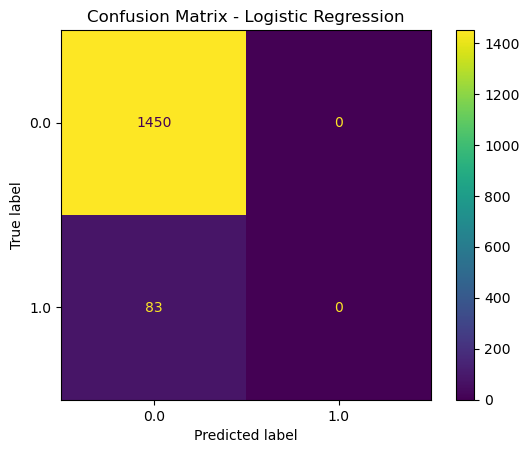

In [23]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(logistic_regression_model, X_test_scaled, y_test)
plt.title("Confusion Matrix - Logistic Regression");

In [24]:
# =================================================-
#### Slide 38: Classification report  ####

# # Create a list of target names to interpret class assignments.
# target_names = df_subset["stroke"].unique()
# target_names = target_names.tolist()
# target_names = [str(x) for x in target_names]
# print(class_report)

In [25]:
perf_df = pd.DataFrame(
    metrics.classification_report(y_test, predicted_values, output_dict=True, zero_division=0)
).T.assign(model="log_reg")
perf_df

,precision,recall,f1-score,support,model
0.0,0.945858,1.000000,0.972176,1450.000000,log_reg
1.0,0.000000,0.000000,0.000000,83.000000,log_reg
accuracy,0.945858,0.945858,0.945858,0.945858,log_reg
macro avg,0.472929,0.500000,0.486088,1533.000000,log_reg
weighted avg,0.894647,0.945858,0.919540,1533.000000,log_reg


In [26]:
# =================================================-
#### Slide 42: Save accuracy score  ####

# model_final = {
#     "metrics": "accuracy",
#     "values": round(test_accuracy_score, 4),
#     "model": "logistic",
# }
# print(model_final)

In [27]:
# =================================================-
#### Slide 43: Getting probabilities instead of class labels  ####

# Get probabilities instead of predicted values.
test_probabilities = logistic_regression_model.predict_proba(X_test_scaled)
print(test_probabilities[0:5, :])
# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]
print(test_predictions[0:5])

[[0.98319229 0.01680771]
 [0.82469877 0.17530123]
 [0.9891839  0.0108161 ]
 [0.84092513 0.15907487]
 [0.96258058 0.03741942]]
[0.01680771 0.17530123 0.0108161  0.15907487 0.03741942]


In [28]:
# =================================================-
#### Slide 44: Computing FPR, TPR, and threshold  ####

# # Get FPR, TPR, and threshold values.
# fpr, tpr, threshold = metrics.roc_curve(
#     y_test, test_predictions  # <- test data labels
# )  # <- predicted probabilities
# print("False positive: ", fpr[:5])
# print("True positive: ", tpr[:5])
# print("Threshold: ", threshold[:5])

In [29]:
# =================================================-
#### Slide 45: Computing AUC  ####

# # Get AUC by providing the FPR and TPR.
# auc = metrics.auc(fpr, tpr)
# print("Area under the ROC curve: ", auc)

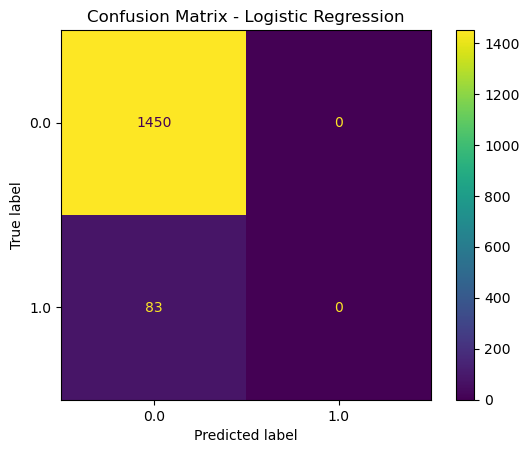

In [30]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(logistic_regression_model, X_test_scaled, y_test)
plt.title("Confusion Matrix - Logistic Regression");

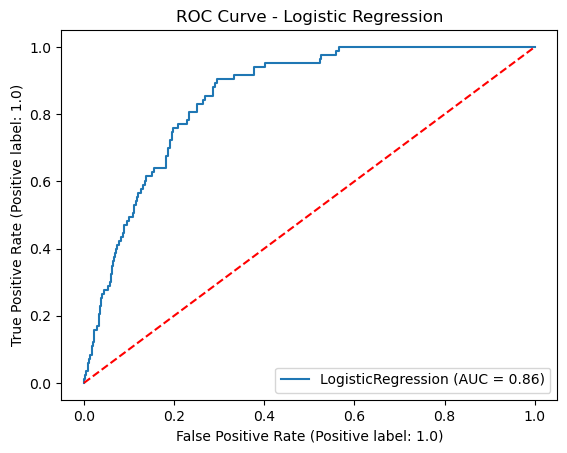

In [31]:
rcd = metrics.RocCurveDisplay.from_estimator(logistic_regression_model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC Curve - Logistic Regression");

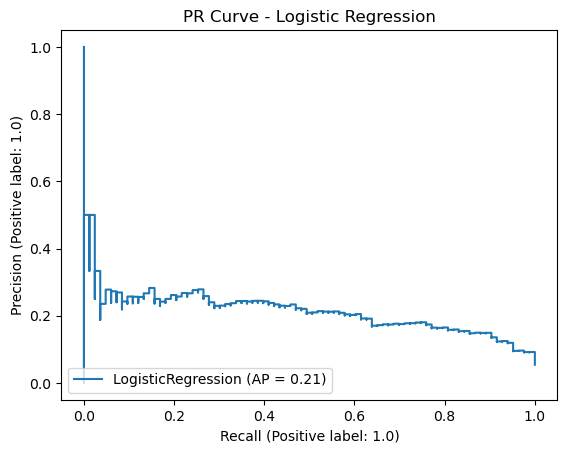

In [32]:
prd = metrics.PrecisionRecallDisplay.from_estimator(logistic_regression_model, X_test_scaled, y_test)
plt.title("PR Curve - Logistic Regression");

In [33]:
rcd.roc_auc

0.8551973410884918

In [34]:
prd.average_precision

0.214389030698966

In [35]:
# =================================================-
#### Slide 46: Putting it all together: ROC plot  ####

# # Make an ROC curve plot.
# plt.title("Receiver Operator Characteristic")
# plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % auc)
# plt.legend(loc="lower right")
# plt.plot([0, 1], [0, 1], "r--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.show()
# # Make an ROC curve plot.
# plt.title("Receiver Operator Characteristic")
# plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % auc)
# plt.legend(loc="lower right")
# plt.plot([0, 1], [0, 1], "r--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [36]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 2 LOGISTICREGRESSION/LOGISTICREGRESSION/LOGISTICREGRESSION LOGISTICREGRESSION 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [37]:
# =================================================-
#### Slide 3: Accuracy on train vs. accuracy on test  ####

# Compute trained model accuracy score.
trained_accuracy_score = logistic_regression_model.score(X_train_scaled, y_train)
print("Accuracy on train data: ", trained_accuracy_score)

Accuracy on train data:  0.9535923958624546


In [38]:
# =================================================-
#### Slide 15: Prepare parameters for optimization  ####

# Create regularization penalty space.
penalty = ["l1", "l2"]
# Create regularization constant space.
C = np.linspace(0.1, 1, 10)
print("Regularization constant: ", C)
# Create hyperparameter options dictionary.
hyperparameters = dict(C=C, penalty=penalty)
print(hyperparameters)

Regularization constant:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'penalty': ['l1', 'l2']}


In [39]:
C >= 1

array([False, False, False, False, False, False, False, False, False,
        True])

In [40]:
# =================================================-
#### Slide 16: Set up cross-validation logistic function  ####

# Grid search 10-fold cross-validation with above parameters.
clf = GridSearchCV(
    linear_model.LogisticRegression(solver="liblinear"),  # <- function to optimize
    hyperparameters,  # <- grid search parameters
    cv=5,  # <- 10-fold cv
    verbose=0,
)  # <- no messages to show
# Fit CV grid search.
clf.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2']})

In [41]:
# =================================================-
#### Slide 17: Check best parameters found by CV  ####

# # Get best penalty and constant parameters.
# penalty = best_model.best_estimator_.get_params()["penalty"]
# constant = best_model.best_estimator_.get_params()["C"]
# print("Best penalty: ", penalty)
# print("Best C: ", constant)

In [42]:
hyperparameters

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'penalty': ['l1', 'l2']}

In [43]:
clf.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [44]:
lr = linear_model.LogisticRegression(**clf.best_params_)

In [45]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5)

In [46]:
# =================================================-
#### Slide 18: Predict using the best model parameters  ####

# Predict on test data using best model.
best_predicted_values = lr.predict(X_test_scaled)
print(best_predicted_values)
# Compute best model accuracy score.
best_accuracy_score = metrics.accuracy_score(y_test, best_predicted_values)
print("Accuracy on test data (best model): ", best_accuracy_score)

[0. 0. 0. ... 0. 0. 0.]
Accuracy on test data (best model):  0.9458577951728636


In [47]:
# =================================================-
#### Slide 19: Accuracy on train vs. accuracy on test  ####

# Compute trained model accuracy score.
trained_accuracy_score = lr.score(X_train_scaled, y_train)
print("Accuracy on train data: ", trained_accuracy_score)

Accuracy on train data:  0.9535923958624546


In [48]:
# =================================================-
#### Slide 20: Assessing the tuned model  ####

# # Compute confusion matrix for best model.
# best_confusion_matrix = metrics.confusion_matrix(y_test, best_predicted_values)
# print(best_confusion_matrix)
# # Create a list of target names to interpret class assignments.
# target_names = ["Low value", "High value"]
# print(best_class_report)

In [49]:
# =================================================-
#### Slide 21: Save accuracy score  ####

# model_final = {
#     "metrics": "accuracy",
#     "values": round(best_accuracy_score, 4),
#     "model": "logistic_tuned",
# }
# print(model_final)

In [50]:
# =================================================-
#### Slide 22: Get metrics for ROC curve  ####

# # Get probabilities instead of predicted values.
# best_test_probabilities = best_model.predict_proba(X_test_scaled)
# print(best_test_probabilities[0:5,])
# # Get probabilities of test predictions only.
# best_test_predictions = best_test_probabilities[:, 1]
# print(best_test_predictions[0:5])

In [51]:
# =================================================-
#### Slide 23: Get metrics for ROC curve (cont'd)  ####

# # Get ROC curve metrics.
# best_fpr, best_tpr, best_threshold = metrics.roc_curve(y_test, best_test_predictions)
# best_auc = metrics.auc(best_fpr, best_tpr)
# print(best_auc)

In [52]:
# =================================================-
#### Slide 24: Plot ROC curve for both models  ####

# # Make an ROC curve plot.
# plt.title("Receiver Operator Characteristic")
# plt.plot(fpr, tpr, "blue", label="AUC = %0.2f" % auc)
# plt.plot(best_fpr, best_tpr, "black", label="AUC (best) = %0.2f" % best_auc)
# plt.legend(loc="lower right")
# plt.plot([0, 1], [0, 1], "r--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate");

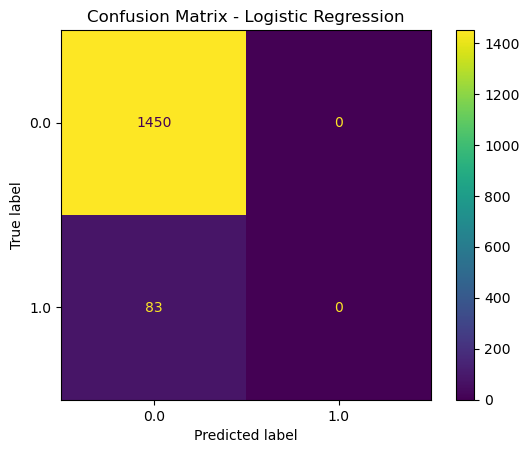

In [53]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title("Confusion Matrix - Logistic Regression");

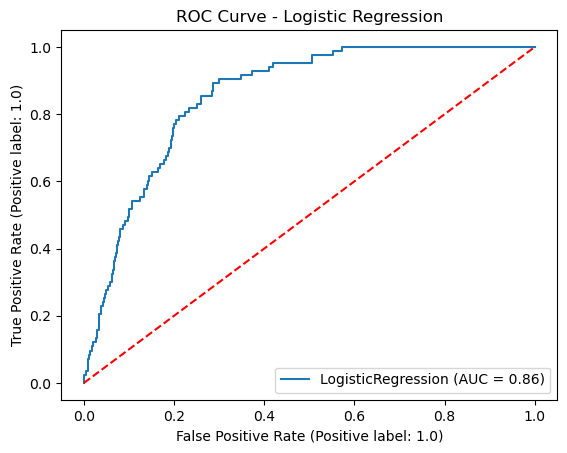

In [54]:
rcd = metrics.RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC Curve - Logistic Regression");

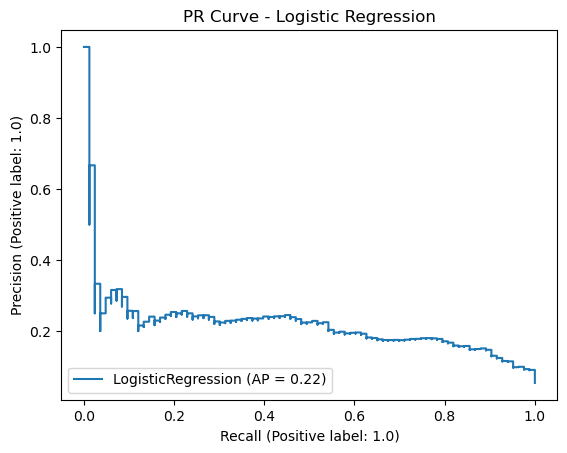

In [55]:
prd = metrics.PrecisionRecallDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title("PR Curve - Logistic Regression");

In [56]:
rcd.roc_auc

0.8555463232239302

In [57]:
prd.average_precision

0.2216738505158745

In [58]:
pd.concat([
    pd.read_pickle(data_dir / "knn-tuning.pkl"),
    perf_df
]).to_pickle(data_dir / "knn-lr-tuning.pkl")

In [59]:
joblib.dump(clf, data_dir / "gscv-lr.pkl")

['/Users/maptv/maptv/Classification-with-Python/data/gscv-lr.pkl']

In [60]:
# =================================================-
#### Slide 26: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################